In [74]:
# 
import json
import cv2
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.iai.v20200303 import iai_client, models
import base64
import matplotlib.pyplot as plt
%matplotlib inline
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [119]:
"""
https://cloud.tencent.com/document/product/867/44989
"""
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "iai.tencentcloudapi.com"
    
    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = iai_client.IaiClient(cred, "ap-beijing", clientProfile) 

    req = models.DetectFaceAttributesRequest()
    
    with open("./images/test2.jpg","rb") as file:
        img=base64.b64encode(file.read()) 
    params = {
        "Image": str(img, encoding='utf-8'), 
        "NeedRotateDetection": 1, # 是否开启图片旋转识别支持。0为不开启，1为开启
        "NeedFaceAttributes":1, # 是否需要返回人脸属性信息（FaceAttributesInfo）
        "NeedQualityDetection":1 #是否开启质量检测。0 为关闭，1 为开启。默认为 0。
    }
    req.from_json_string(json.dumps(params))

    resp = client.DetectFaceAttributes(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

d:\python\venv(data_analysis)\lib\site-packages\tencentcloud\iai\v20200303\models.py:1058: UserWarning: NeedFaceAttributes,NeedQualityDetection fileds are useless.
  warnings.warn("%s fileds are useless." % ",".join(memeber_set))


{'ImageWidth': 300, 'ImageHeight': 300, 'FaceDetailInfos': [{'FaceRect': {'X': 73, 'Y': 78, 'Width': 135, 'Height': 176}, 'FaceDetailAttributesInfo': {'Age': 0, 'Beauty': 0, 'Emotion': {'Type': 0, 'Probability': 0}, 'Eye': {'Glass': {'Type': 0, 'Probability': 0}, 'EyeOpen': {'Type': 0, 'Probability': 0}, 'EyelidType': {'Type': 0, 'Probability': 0}, 'EyeSize': {'Type': 0, 'Probability': 0}}, 'Eyebrow': {'EyebrowDensity': {'Type': 0, 'Probability': 0}, 'EyebrowCurve': {'Type': 0, 'Probability': 0}, 'EyebrowLength': {'Type': 0, 'Probability': 0}}, 'Gender': {'Type': 0, 'Probability': 0}, 'Hair': {'Length': {'Type': 0, 'Probability': 0}, 'Bang': {'Type': 0, 'Probability': 0}, 'Color': {'Type': 0, 'Probability': 0}}, 'Hat': {'Style': {'Type': 0, 'Probability': 0}, 'Color': {'Type': 0, 'Probability': 0}}, 'HeadPose': {'Pitch': 0, 'Yaw': 0, 'Roll': 0}, 'Mask': {'Type': 0, 'Probability': 0}, 'Mouth': {'MouthOpen': {'Type': 0, 'Probability': 0}}, 'Moustache': {'Type': 0, 'Probability': 0}, 'Nos

In [87]:
"""
ImageWidth	Integer	请求的图片宽度。
ImageHeight	Integer	请求的图片高度。
FaceInfos	Array of FaceInfo	人脸信息列表。包含人脸坐标信息、属性信息（若需要）、质量分信息（若需要）。
FaceModelVersion	String	人脸识别所用的算法模型版本。
RequestId	String	唯一请求 ID，每次请求都会返回。定位问题时需要提供该次请求的 RequestId。
"""

'\nImageWidth\tInteger\t请求的图片宽度。\nImageHeight\tInteger\t请求的图片高度。\nFaceInfos\tArray of FaceInfo\t人脸信息列表。包含人脸坐标信息、属性信息（若需要）、质量分信息（若需要）。\nFaceModelVersion\tString\t人脸识别所用的算法模型版本。\nRequestId\tString\t唯一请求 ID，每次请求都会返回。定位问题时需要提供该次请求的 RequestId。\n'

In [101]:
resp['FaceDetailInfos'][0]

{'FaceRect': {'X': 387, 'Y': 73, 'Width': 54, 'Height': 60},
 'FaceDetailAttributesInfo': {'Age': 0,
  'Beauty': 0,
  'Emotion': {'Type': 0, 'Probability': 0},
  'Eye': {'Glass': {'Type': 0, 'Probability': 0},
   'EyeOpen': {'Type': 0, 'Probability': 0},
   'EyelidType': {'Type': 0, 'Probability': 0},
   'EyeSize': {'Type': 0, 'Probability': 0}},
  'Eyebrow': {'EyebrowDensity': {'Type': 0, 'Probability': 0},
   'EyebrowCurve': {'Type': 0, 'Probability': 0},
   'EyebrowLength': {'Type': 0, 'Probability': 0}},
  'Gender': {'Type': 0, 'Probability': 0},
  'Hair': {'Length': {'Type': 0, 'Probability': 0},
   'Bang': {'Type': 0, 'Probability': 0},
   'Color': {'Type': 0, 'Probability': 0}},
  'Hat': {'Style': {'Type': 0, 'Probability': 0},
   'Color': {'Type': 0, 'Probability': 0}},
  'HeadPose': {'Pitch': 0, 'Yaw': 0, 'Roll': 0},
  'Mask': {'Type': 0, 'Probability': 0},
  'Mouth': {'MouthOpen': {'Type': 0, 'Probability': 0}},
  'Moustache': {'Type': 0, 'Probability': 0},
  'Nose': {'Type':

In [120]:
resp['FaceDetailInfos'][0]['FaceDetailAttributesInfo']
"""
人脸属性信息，包含性别( gender )、年龄( age )、表情( expression )、
魅力( beauty )、眼镜( glass )、口罩（mask）、头发（hair）和姿态 (pitch，roll，yaw )。
只有当 NeedFaceAttributes 设为 1 时才返回有效信息。

"""

'\n人脸属性信息，包含性别( gender )、年龄( age )、表情( expression )、\n魅力( beauty )、眼镜( glass )、口罩（mask）、头发（hair）和姿态 (pitch，roll，yaw )。\n只有当 NeedFaceAttributes 设为 1 时才返回有效信息。\n\n'

In [122]:
resp['FaceDetailInfos']


[{'FaceRect': {'X': 73, 'Y': 78, 'Width': 135, 'Height': 176},
  'FaceDetailAttributesInfo': {'Age': 0,
   'Beauty': 0,
   'Emotion': {'Type': 0, 'Probability': 0},
   'Eye': {'Glass': {'Type': 0, 'Probability': 0},
    'EyeOpen': {'Type': 0, 'Probability': 0},
    'EyelidType': {'Type': 0, 'Probability': 0},
    'EyeSize': {'Type': 0, 'Probability': 0}},
   'Eyebrow': {'EyebrowDensity': {'Type': 0, 'Probability': 0},
    'EyebrowCurve': {'Type': 0, 'Probability': 0},
    'EyebrowLength': {'Type': 0, 'Probability': 0}},
   'Gender': {'Type': 0, 'Probability': 0},
   'Hair': {'Length': {'Type': 0, 'Probability': 0},
    'Bang': {'Type': 0, 'Probability': 0},
    'Color': {'Type': 0, 'Probability': 0}},
   'Hat': {'Style': {'Type': 0, 'Probability': 0},
    'Color': {'Type': 0, 'Probability': 0}},
   'HeadPose': {'Pitch': 0, 'Yaw': 0, 'Roll': 0},
   'Mask': {'Type': 0, 'Probability': 0},
   'Mouth': {'MouthOpen': {'Type': 0, 'Probability': 0}},
   'Moustache': {'Type': 0, 'Probability': 

In [123]:
resp.keys()

dict_keys(['ImageWidth', 'ImageHeight', 'FaceDetailInfos', 'FaceModelVersion', 'RequestId'])

In [72]:
X=resp['FaceDetailInfos'][0]['FaceRect']["X"]
Y=resp['FaceDetailInfos'][0]['FaceRect']["Y"]
Width=resp['FaceDetailInfos'][0]['FaceRect']["Width"]
Height=resp['FaceDetailInfos'][0]['FaceRect']["Height"]
"""
{'': 73, 'Y': 78, 'Width': 135, 'Height': 176}
"""
type(Width)

int

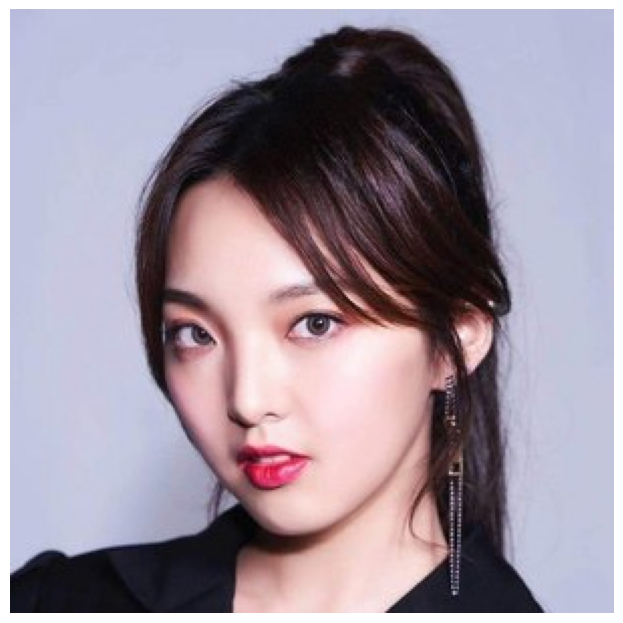

In [62]:
starts_pic = plt.imread("./images/test2.jpg")
plt.figure(figsize=(20,8), dpi=100)
plt.imshow(starts_pic)
plt.axis("off")
plt.show()

In [82]:
res=cv2.rectangle(starts_pic,(X,Y), (X+Width,Y+Height),(0,0,255), 4)


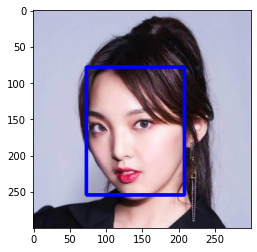

In [84]:
plt.imshow(res)

In [90]:
try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "iai.tencentcloudapi.com"
    
    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = iai_client.IaiClient(cred, "ap-beijing", clientProfile) 

    req = models.DetectFaceAttributesRequest()
    
    with open("./images/test.jpg","rb") as file:
        img=base64.b64encode(file.read()) 
    params = {
        "Image": str(img, encoding='utf-8'), 
        "MaxFaceNum":20,
         "NeedRotateDetection": 1,
        "NeedFaceAttributes":1


    }
    req.from_json_string(json.dumps(params))

    resp = client.DetectFaceAttributes(req).to_json_string()
    resp=json.loads(resp)
    print(resp) 

except TencentCloudSDKException as err: 
    print(err) 

{'ImageWidth': 640, 'ImageHeight': 363, 'FaceDetailInfos': [{'FaceRect': {'X': 387, 'Y': 73, 'Width': 54, 'Height': 60}, 'FaceDetailAttributesInfo': {'Age': 0, 'Beauty': 0, 'Emotion': {'Type': 0, 'Probability': 0}, 'Eye': {'Glass': {'Type': 0, 'Probability': 0}, 'EyeOpen': {'Type': 0, 'Probability': 0}, 'EyelidType': {'Type': 0, 'Probability': 0}, 'EyeSize': {'Type': 0, 'Probability': 0}}, 'Eyebrow': {'EyebrowDensity': {'Type': 0, 'Probability': 0}, 'EyebrowCurve': {'Type': 0, 'Probability': 0}, 'EyebrowLength': {'Type': 0, 'Probability': 0}}, 'Gender': {'Type': 0, 'Probability': 0}, 'Hair': {'Length': {'Type': 0, 'Probability': 0}, 'Bang': {'Type': 0, 'Probability': 0}, 'Color': {'Type': 0, 'Probability': 0}}, 'Hat': {'Style': {'Type': 0, 'Probability': 0}, 'Color': {'Type': 0, 'Probability': 0}}, 'HeadPose': {'Pitch': 0, 'Yaw': 0, 'Roll': 0}, 'Mask': {'Type': 0, 'Probability': 0}, 'Mouth': {'MouthOpen': {'Type': 0, 'Probability': 0}}, 'Moustache': {'Type': 0, 'Probability': 0}, 'Nose

In [95]:
resp['FaceDetailInfos'][0]['FaceRect']

{'X': 387, 'Y': 73, 'Width': 54, 'Height': 60}

In [99]:
res=plt.imread("./images/test.jpg")
for face in resp['FaceDetailInfos']:
    X=face['FaceRect']["X"]
    Y=face['FaceRect']["Y"]
    Width=face['FaceRect']["Width"]
    Height=face['FaceRect']["Height"]
    res=cv2.rectangle(res,(X,Y), (X+Width,Y+Height),(0,0,255), 4)

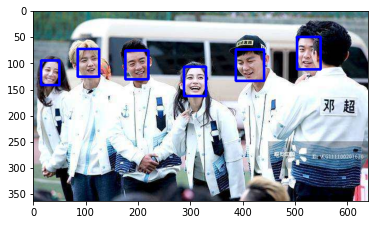

In [100]:
plt.imshow(res)